<div class='alert alert-info alert-block' align='center'><h1>HR ANALYTICS</h1></div>

## Scope of Project

Factors which help to know the Attrition


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# setting option to max column display to 50
pd.set_option('display.max_columns',50)

In [3]:
# getting all the files names 
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'HR_Analytics.csv',
 'HR_Analytics.ipynb',
 'Hr_Analytics_Dashboard.pbix']

In [4]:
# loading dataset
df = pd.read_csv(r"HR_Analytics.csv")

In [5]:
# top 5 rows of the dataset
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [6]:
# rows and columns in dataset
df.shape

(1480, 38)

In [7]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [8]:
# checking for the null records in the dataset
df.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [9]:
# checking for the duplicates records
df.duplicated().sum()

7

<div class='alert alert-info alert-block' align='center'><h2>Exploratory Data Analysis</h2></div>

In [11]:
# Statistical analysis of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1480.0,36.917568,9.128559,18.0,30.00,36.0,43.00,60.0
DailyRate,1480.0,801.384459,403.126988,102.0,465.00,800.0,1157.00,1499.0
DistanceFromHome,1480.0,9.220270,8.131201,1.0,2.00,7.0,14.00,29.0
Education,1480.0,2.910811,1.023796,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1480.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1480.0,1031.860811,605.955046,1.0,493.75,1027.5,1568.25,2068.0
EnvironmentSatisfaction,1480.0,2.724324,1.092579,1.0,2.00,3.0,4.00,4.0
HourlyRate,1480.0,65.845270,20.328266,30.0,48.00,66.0,83.00,100.0
JobInvolvement,1480.0,2.729730,0.713007,1.0,2.00,3.0,3.00,4.0
JobLevel,1480.0,2.064865,1.105574,1.0,1.00,2.0,3.00,5.0


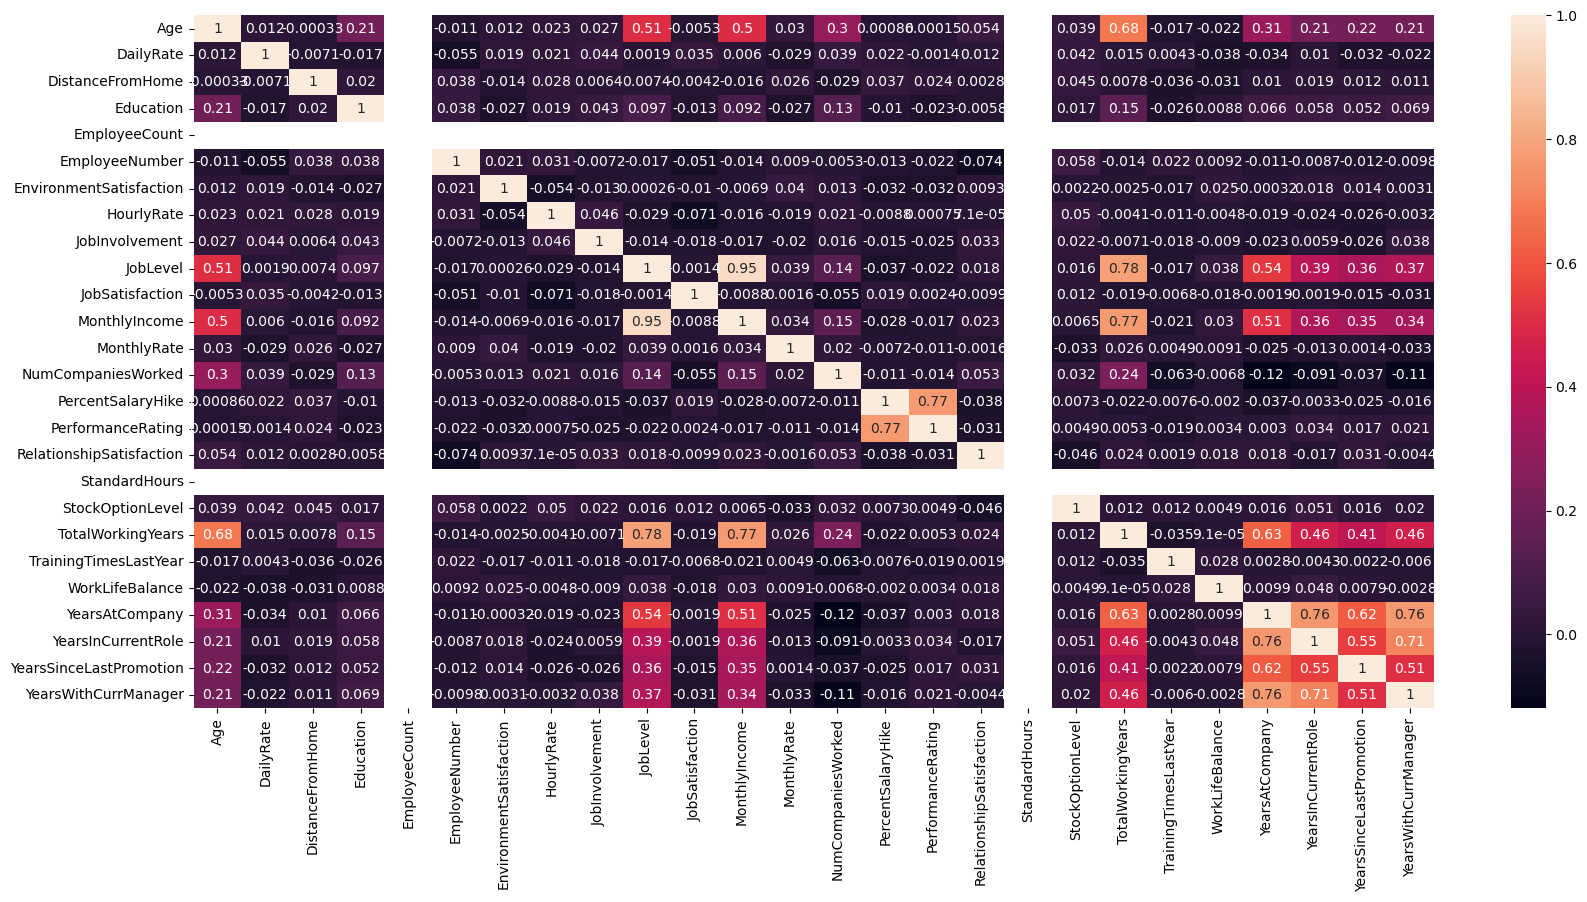

In [12]:
# heatmap -> columns correlation
cor = df.corr(numeric_only=True)
plt.figure(figsize=(20,9))
sns.heatmap(cor,annot=True,fmt='.2g')
plt.show()

In [123]:
# adding attrition01 column
df['Attrition01'] = df['Attrition'].map({'Yes':1,'No':0})

In [131]:
# correlation of numeric column with attrition01 column
df.corr(numeric_only=True)['Attrition01']*100

Age                         -15.547632
DailyRate                    -5.697601
DistanceFromHome              8.000649
Education                    -3.014352
EmployeeCount                      NaN
EmployeeNumber               -1.237593
EnvironmentSatisfaction     -10.169601
HourlyRate                   -0.825220
JobInvolvement              -13.076859
JobLevel                    -16.715024
JobSatisfaction             -10.423222
MonthlyIncome               -15.767249
MonthlyRate                   1.658505
NumCompaniesWorked            4.533609
PercentSalaryHike            -1.460327
PerformanceRating             0.253139
RelationshipSatisfaction     -4.538679
StandardHours                      NaN
StockOptionLevel            -13.513966
TotalWorkingYears           -16.835769
TrainingTimesLastYear        -5.841504
WorkLifeBalance              -6.264595
YearsAtCompany              -13.510807
YearsInCurrentRole          -16.096822
YearsSinceLastPromotion      -3.224431
YearsWithCurrManager     

In [13]:
# uniques records from columns which has less than 20 values
for col in df.columns:
    if df[col].nunique()<=20:
        print('Column : ',col)
        print(list(df[col].unique()))
        print()

Column :  AgeGroup
['18-25', '26-35', '36-45', '46-55', '55+']

Column :  Attrition
['Yes', 'No']

Column :  BusinessTravel
['Travel_Rarely', 'Travel_Frequently', 'Non-Travel', 'TravelRarely']

Column :  Department
['Research & Development', 'Sales', 'Human Resources']

Column :  Education
[3, 2, 1, 4, 5]

Column :  EducationField
['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other', 'Human Resources']

Column :  EmployeeCount
[1]

Column :  EnvironmentSatisfaction
[3, 4, 2, 1]

Column :  Gender
['Male', 'Female']

Column :  JobInvolvement
[3, 2, 1, 4]

Column :  JobLevel
[1, 2, 3, 4, 5]

Column :  JobRole
['Laboratory Technician', 'Sales Representative', 'Research Scientist', 'Human Resources', 'Manufacturing Director', 'Sales Executive', 'Healthcare Representative', 'Research Director', 'Manager']

Column :  JobSatisfaction
[3, 2, 4, 1]

Column :  MaritalStatus
['Single', 'Divorced', 'Married']

Column :  SalarySlab
['Upto 5k', '5k-10k', '10k-15k', '15k+']

Column : 

In [14]:
# columns name of dataset
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
# count of genders
df['Gender'].value_counts()

Gender
Male      889
Female    591
Name: count, dtype: int64

In [16]:
# attrition value count
df['Attrition'].value_counts()

Attrition
No     1242
Yes     238
Name: count, dtype: int64

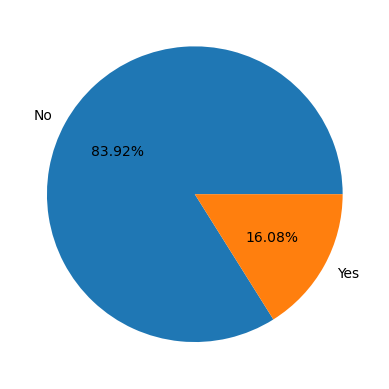

In [94]:
# pie plot of attrition 
cnt = df['Attrition'].value_counts()
plt.pie(x=cnt.values,labels=cnt.keys(),autopct='%0.2f%%')
plt.show()

In [17]:
# Create a cross-tabulation table showing the count of employees (EmpID) by Gender and Attrition status
pd.crosstab(df['Attrition'],df['Gender'],values=df['EmpID'],aggfunc='count')

Gender,Female,Male
Attrition,,
No,504,738
Yes,87,151


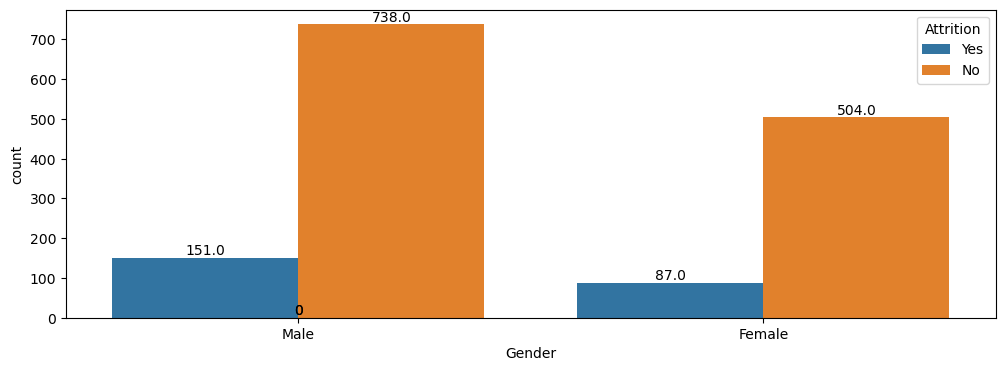

In [88]:
# Plotting a count plot for Gender with Attrition as the hue
plt.figure(figsize=(12,4))

ax = sns.countplot(data=df,x='Gender',hue='Attrition')

# Adding labels
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height),  # Position at the center-top of each bar
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [18]:
# Create a cross-tabulation table showing the count of employees (EmpID) by AgeGroup and Attrition status
pd.crosstab(df['Gender'],df['AgeGroup'],values=df['EmpID'],aggfunc='count')

AgeGroup,18-25,26-35,36-45,46-55,55+
Gender,,,,,
Female,43,240,187,100,21
Male,80,371,284,128,26


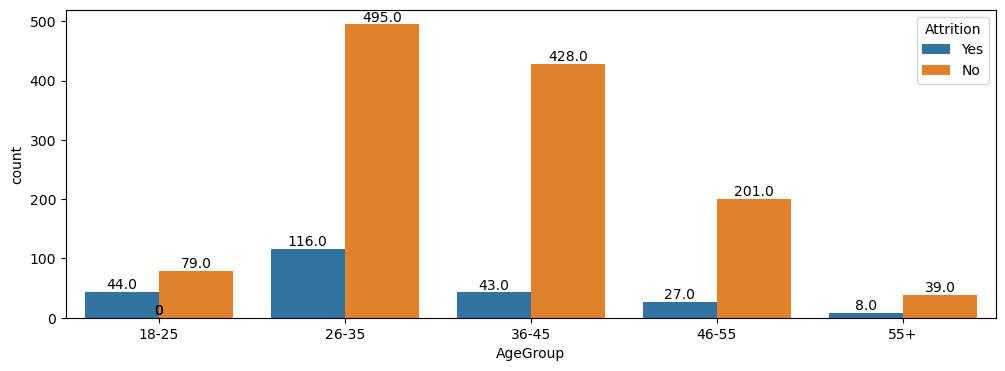

In [134]:
# Plotting a count plot for AgeGroup with Attrition as the hue
plt.figure(figsize=(12,4))

ax = sns.countplot(data=df,x='AgeGroup',hue='Attrition')

# Adding labels
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height),  # Position at the center-top of each bar
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [19]:
# Create a cross-tabulation table showing the count of employees (EmpID) by Department and Attrition status
pd.crosstab(df['Attrition'],df['Department'],values=df['EmpID'],aggfunc='count')

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,834,357
Yes,12,133,93


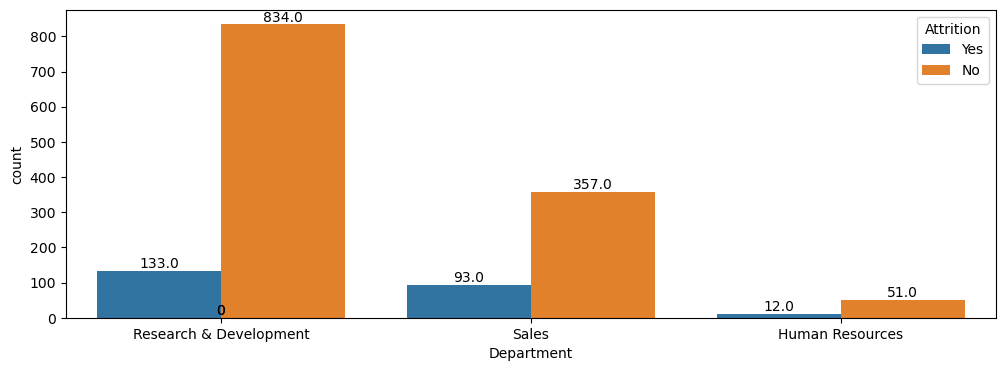

In [86]:
# Plotting a count plot for Department with Attrition as the hue
plt.figure(figsize=(12,4))

ax = sns.countplot(data=df,x='Department',hue='Attrition')

# Adding labels
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height),  # Position at the center-top of each bar
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [21]:
# Create a cross-tabulation table showing the count of employees (EmpID) by Salary Slab and Attrition status
pd.crosstab(df['Attrition'],df['SalarySlab'],values=df['EmpID'],aggfunc='count')

SalarySlab,10k-15k,15k+,5k-10k,Upto 5k
Attrition,,,,
No,129,128,395,590
Yes,21,5,49,163


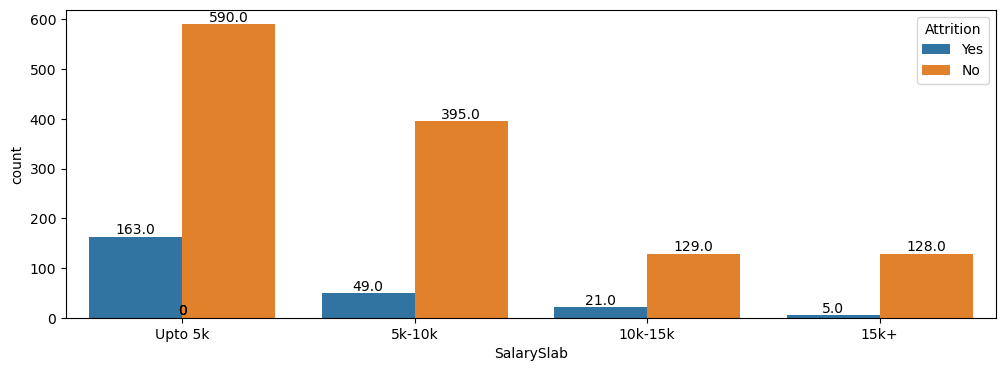

In [84]:
# Plotting a count plot for SalarySlab with Attrition as the hue
plt.figure(figsize=(12,4))

ax = sns.countplot(data=df,x='SalarySlab',hue='Attrition')

# Adding labels
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height),  # Position at the center-top of each bar
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [22]:
# Create a cross-tabulation table showing the count of employees (EmpID) by Job Satisfaction and Attrition status
pd.crosstab(df['SalarySlab'],df['JobSatisfaction'],values=df['EmpID'],aggfunc='count')

JobSatisfaction,1,2,3,4
SalarySlab,,,,
10k-15k,29,29,46,46
15k+,27,27,39,40
5k-10k,90,80,123,151
Upto 5k,147,146,236,224


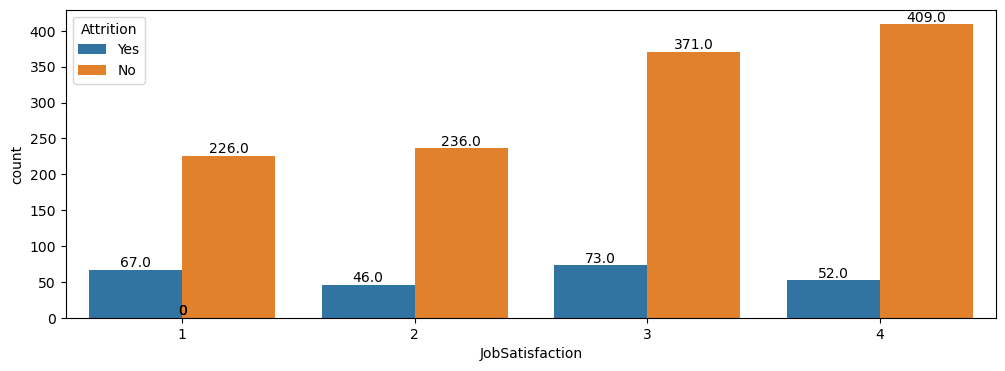

In [82]:
# Plotting a count plot for Jobsatisfaction with Attrition as the hue
plt.figure(figsize=(12,4))

ax = sns.countplot(data=df,x='JobSatisfaction',hue='Attrition')

# Adding labels
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height),  # Position at the center-top of each bar
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [46]:
# Create a cross-tabulation table showing the count of employees (EmpID) by Job Role and Attrition status
pd.crosstab(df['Attrition'],df['JobRole'],values=df['EmpID'],aggfunc='count')

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,123,40,199,97,137,78,246,271,51
Yes,9,12,62,5,10,2,47,58,33


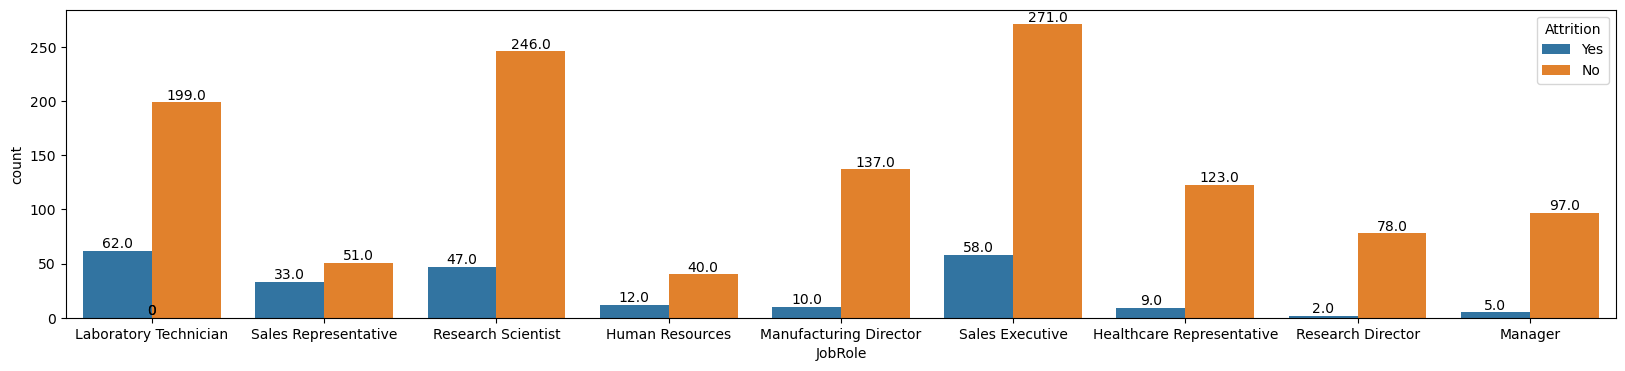

In [80]:
# Plotting a count plot for JobRole with Attrition as the hue
plt.figure(figsize=(20,4))

ax = sns.countplot(data=df,x='JobRole',hue='Attrition')

# Adding labels
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height),  # Position at the center-top of each bar
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [48]:
# Create a cross-tabulation table showing the count of employees (EmpID) by Job Level and Attrition status
pd.crosstab(df['Attrition'],df['JobLevel'],values=df['EmpID'],aggfunc='count')

JobLevel,1,2,3,4,5
Attrition,,,,,
No,402,487,187,102,64
Yes,143,52,33,5,5


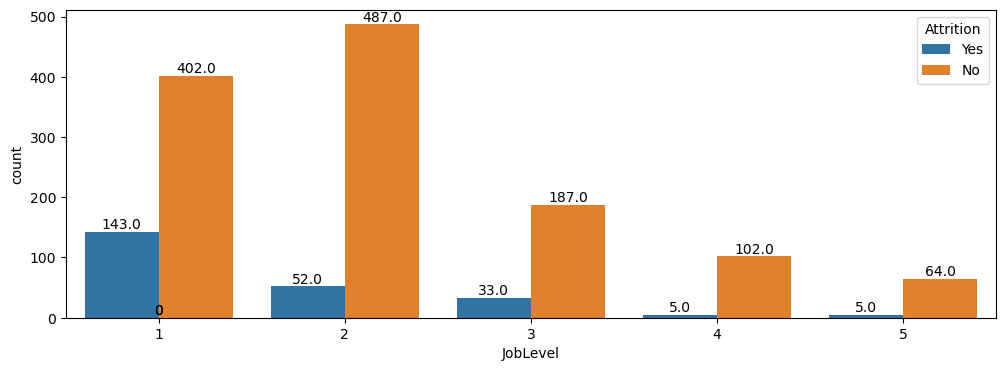

In [74]:
# Plotting a count plot for JobLevel with Attrition as the hue
plt.figure(figsize=(12,4))

ax = sns.countplot(data=df,x='JobLevel',hue='Attrition')

# Adding labels
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height),  # Position at the center-top of each bar
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [50]:
# Create a cross-tabulation table showing the count of employees (EmpID) by Marital Status and Attrition status
pd.crosstab(df['Attrition'],df['MaritalStatus'],values=df['EmpID'],aggfunc='count')

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,595,353
Yes,34,84,120


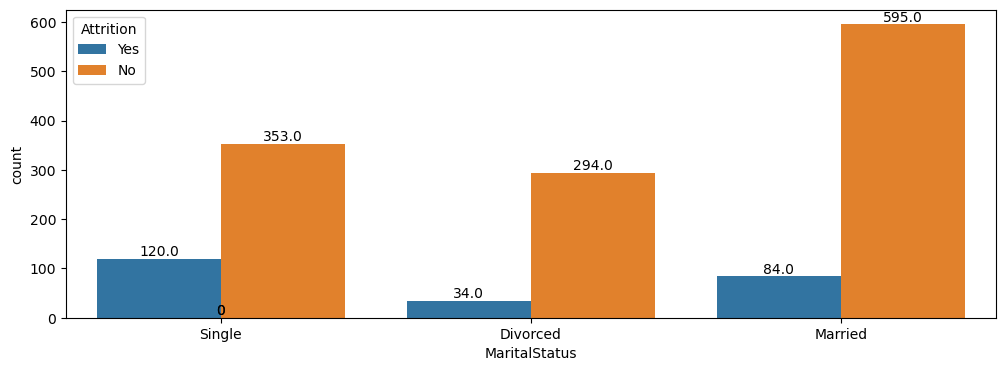

In [72]:
# Plotting a count plot for Marital Status with Attrition as the hue
plt.figure(figsize=(12,4))

ax = sns.countplot(data=df,x='MaritalStatus',hue='Attrition')

# Adding labels
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height),  # Position at the center-top of each bar
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [52]:
# Create a cross-tabulation table showing the count of employees (EmpID) by Environment Satisfaction and Attrition status
pd.crosstab(df['Attrition'],df['EnvironmentSatisfaction'],values=df['EmpID'],aggfunc='count')

EnvironmentSatisfaction,1,2,3,4
Attrition,,,,
No,212,248,392,390
Yes,72,43,62,61


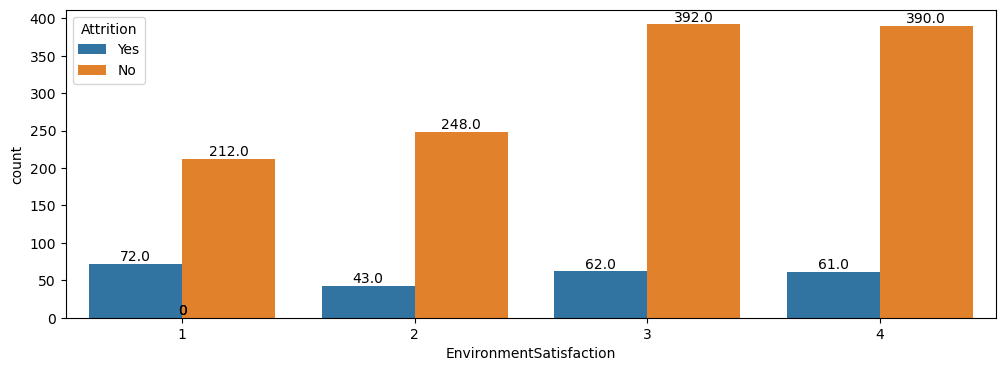

In [70]:
# Plotting a count plot for Environment Satisfaction with Attrition as the hue
plt.figure(figsize=(12,4))

ax = sns.countplot(data=df,x='EnvironmentSatisfaction',hue='Attrition')

# Adding labels
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height),  # Position at the center-top of each bar
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

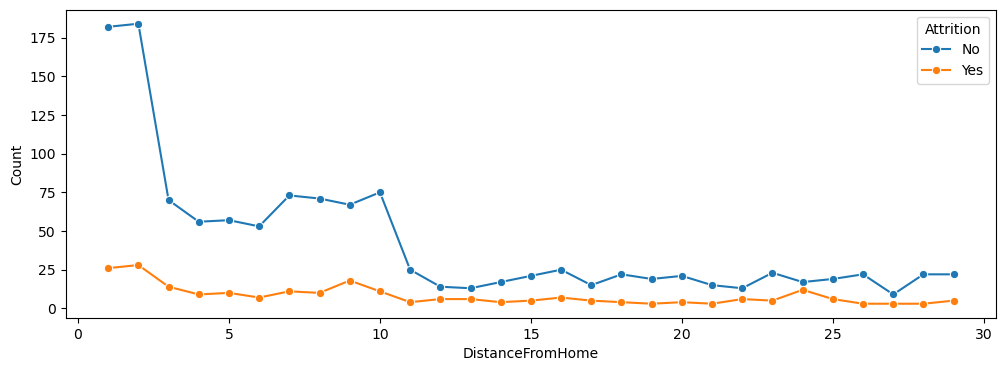

In [109]:
# Plotting a line plot for Distance From Home with Attrition as the hue
df_count = df.groupby(['DistanceFromHome', 'Attrition']).size().reset_index(name='count')

plt.figure(figsize=(12, 4))

sns.lineplot(data=df_count, x='DistanceFromHome', y='count', hue='Attrition', marker="o")

plt.ylabel("Count")
plt.show()

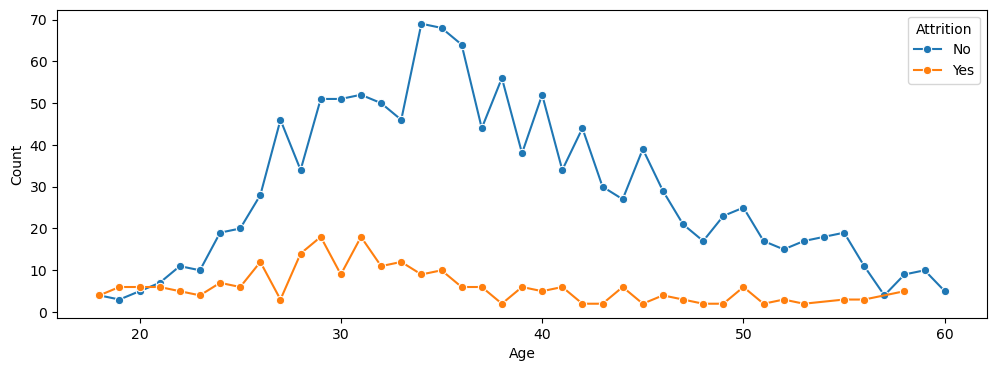

In [111]:
# Plotting a Line plot for Age with Attrition as the hue
df_count = df.groupby(['Age', 'Attrition']).size().reset_index(name='count')

plt.figure(figsize=(12, 4))

sns.lineplot(data=df_count, x='Age', y='count', hue='Attrition', marker="o")

plt.ylabel("Count")
plt.show()